<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [76]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [77]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [78]:
import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [79]:
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  #Parameters can be seen as list beta and gamma

In [80]:
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [81]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])

In [82]:
import pandas as pd
Beta = pd.DataFrame(beta_list)

In [83]:

from random import sample

In [84]:
S_value = pd.DataFrame(P)
S_value.to_csv("Susceptible.csv")

In [85]:
I_value = pd.DataFrame(Q)
I_value.to_csv("Infected.csv")

In [86]:
R_value = pd.DataFrame(M)
R_value.to_csv("Recovered.csv")

In [87]:
S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [88]:
S_actual

[[202.92999005217678],
 [202.84589959180732],
 [349.6627459330223],
 [202.8458995915532],
 [202.84703693235505],
 [202.84735133699394],
 [202.84589988546344],
 [202.84590000945516],
 [202.84649140635955],
 [202.84589959197547],
 [203.02010997734766],
 [202.84590042076272],
 [858.9476294989838],
 [204.74675551126236],
 [795.1386613538331],
 [202.84590365553774],
 [885.2652236670332],
 [754.4851182183235],
 [218.18345079118345],
 [928.0170906345681],
 [228.1812234839859],
 [862.1211629525731],
 [202.84763275056773],
 [202.8459134440907],
 [202.84590039435548],
 [208.1133596314447],
 [954.7382102458389],
 [214.21776126265988],
 [202.84610314518923],
 [899.772538099944],
 [208.76416665782037],
 [202.84591433615594],
 [202.84592304770985],
 [240.57875297217612],
 [202.84589959174934],
 [922.3789604476738],
 [992.8200596556176],
 [202.84610691907093],
 [225.42142762850207],
 [202.84590273061758],
 [205.23191240260826],
 [385.50348976516943],
 [202.84589959165856],
 [556.6922771091539],
 [572

In [90]:
sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]
  



In [91]:
infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]
  



In [92]:
recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  



In [93]:
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

In [94]:
infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

In [95]:
recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [96]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)
beta_actual = pd.DataFrame(beta)


In [97]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,beta_actual], axis=1)


In [98]:
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,202.988627,2.089617e-01,796.802411,202.929990,1.231433e-01,796.946867,1.780219
1,202.845900,-3.450596e-10,797.154100,202.845900,-2.407821e-10,797.154100,1.987287
2,358.457043,1.290700e+02,512.472977,349.662746,1.254444e+02,524.892837,0.195178
3,202.845900,-3.674087e-10,797.154100,202.845900,-3.923641e-10,797.154100,1.624380
4,202.847247,1.974445e-03,797.150778,202.847037,1.666112e-03,797.151297,0.571404
...,...,...,...,...,...,...,...
995,202.845902,3.435214e-06,797.154095,202.845901,2.076576e-06,797.154097,1.694162
996,243.285073,5.045449e+01,706.260437,233.039330,3.918690e+01,727.773765,0.964284
997,202.845903,5.206549e-06,797.154092,202.845902,3.275766e-06,797.154095,1.559128
998,879.647712,5.673565e+01,63.616638,850.515283,6.902852e+01,80.456197,0.536608


In [99]:
X = data[[0,1,2,3,4,5]]
y = data[6]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [103]:
X_train

,0,1,2,3,4,5
29,945.649922,2.690891e+01,27.441169,899.772538,4.792107e+01,52.306391
535,210.634080,1.104974e+01,778.316181,209.435886,9.395557e+00,781.168557
695,203.973592,1.644287e+00,794.382122,203.646872,1.169477e+00,795.183651
557,202.845900,-3.976241e-11,797.154100,202.845900,-3.864114e-11,797.154100
836,203.233353,5.666799e-01,796.199967,203.157713,4.561930e-01,796.386094
...,...,...,...,...,...,...
106,553.324507,1.512704e+02,295.405069,529.252233,1.531029e+02,317.644824
270,202.845900,-4.045348e-10,797.154100,202.845900,-4.745089e-10,797.154100
860,205.140851,3.330172e+00,791.528977,204.847900,2.908588e+00,792.243512
435,202.984911,2.035234e-01,796.811566,202.968847,1.800172e-01,796.851136


In [104]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.39347695899281854
R2 score of training set is 0.5092546217665885


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.3897011059029367
R2 score of test set is 0.5437624492697377


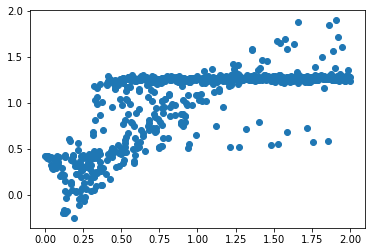

In [105]:
plt.scatter(y_train,y_train_predicted)

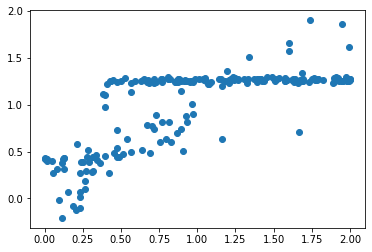

In [106]:
plt.scatter(y_test,y_test_predict)